In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from tqdm import tqdm

plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor":  (0.12 , 0.12, 0.12, 1),
    "axes.facecolor": (0.12 , 0.12, 0.12, 1),
})

In [23]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [24]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [25]:
#Fonction coût

def log_loss(A, y):
    epsilon = 1e-15
    return 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

In [26]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [27]:
#Descente de Gradients

def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [28]:
def predict(X, W, b):
    A = model(X, W, b)
    return A >= 0.5

In [29]:
def artificial_neuron(X_train, y_train, X_test, y_test, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X_train)

    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []

    for i in tqdm(range(n_iter)):
        A = model(X_train, W, b)

        if i %10 == 0:
            # Train
            train_loss.append(log_loss(A, y_train))
            y_pred = predict(X_train, W, b)
            train_acc.append(accuracy_score(y_train, y_pred))

            # Test
            A_test = model(X_test, W, b)
            test_loss.append(log_loss(A_test, y_test))
            y_pred = predict(X_test, W, b)
            test_acc.append(accuracy_score(y_test, y_pred))

        # mise a jour
        dW, db = gradients(A, X_train, y_train)
        W, b = update(dW, db, W, b, learning_rate)


    y_pred = predict(X_train, W, b)
    print("Dimension de y:", y_train.shape)
    print("Dimension de y_pred:", y_pred.shape)
    print("Accuracy:", accuracy_score(y_train, y_pred))

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.plot(test_loss, label='test loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.plot(test_acc, label='test acc')
    plt.legend()
    plt.show()

    return (W, b)

# Dataset

In [30]:
from utilities import *

X_train, y_train, X_test, y_test = load_data()

In [31]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500], dtype=int64))


In [32]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100], dtype=int64))


In [33]:
X_train_reshape = X_train.reshape(X_train.shape[0], -1) / X_train.max()
X_train_reshape.shape

(1000, 4096)

In [34]:
X_test_reshape = X_test.reshape(X_test.shape[0], -1) / X_train.max()
X_test_reshape.shape

(200, 4096)

100%|██████████| 1000/1000 [00:06<00:00, 156.00it/s]


Dimension de y: (1000, 1)
Dimension de y_pred: (1000, 1)
Accuracy: 0.572


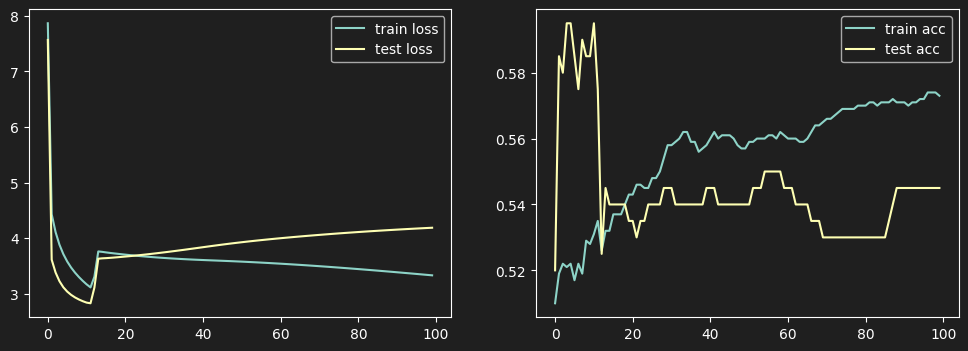

In [35]:
#Entraînement du modèle

W, b = artificial_neuron(X_train_reshape, y_train, X_test_reshape, y_test, learning_rate = 0.05, n_iter=1000)

# Analyse des résultats

In [36]:
A = predict(X_test_reshape,W,b)

Prédiction : [ True]


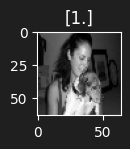

In [36]:
#True = dog
#False = cat

i = 7
print("Prédiction :", A[i])

plt.subplot(4, 5, i)
plt.imshow(X_train[i], cmap='gray')
plt.title(y_train[i])
plt.tight_layout()
plt.show()